# Ad Revenue Prediction Model- Based on Supervised Learning Approach

In [1]:
## Importing python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data1 = pd.read_csv('C:/Users/rohit/OneDrive/Desktop/rohit/jupyter/Train_data.csv')
data2 = pd.read_csv('C:/Users/rohit/OneDrive/Desktop/rohit/jupyter/Test_Data.csv')

## Exploratory Data Analysis

In [3]:
data1.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
data2.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [5]:
data1['date'] = pd.to_datetime(data1.date)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16816\167093322.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['date'] = pd.to_datetime(data1.date)


In [6]:
data1.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [7]:
data1['date'].dt.day_name().value_counts()

Saturday     688
Sunday       671
Thursday     671
Wednesday    657
Friday       652
Monday       630
Tuesday      602
Name: date, dtype: int64

In [8]:
data1.shape

(4571, 9)

In [9]:
data2.shape

(318, 8)

## Creating new attributes

In [10]:
data1['CPC'] = data1['cost']/data1['clicks']
data1['cost/impressions'] = data1['cost']/data1['impressions']
data1['CPCON'] = data1['cost']/data1['conversions']
data1['clicks/impressions'] = data1['clicks']/data1['impressions']

In [11]:
data2['cost/clicks'] = data2['cost']/data2['clicks']
data2['cost/impressions'] = data2['cost']/data2['impressions']
data2['cost/conversions'] = data2['cost']/data2['conversions']
data2['clicks/impressions'] = data2['clicks']/data2['impressions']

In [12]:
data1 = data1.replace(np.inf, np.nan)
data1 = data1.fillna(0)
data2 = data2.replace(np.inf, np.nan)
data2 = data2.fillna(0)

## Applying One Hot Encoding 

In [13]:
one_hot = pd.get_dummies(data1['adgroup'])
data1 = data1.drop('adgroup',axis = 1)
data1 = data1.join(one_hot)

In [14]:
one_hot = pd.get_dummies(data2['adgroup'])
data2 = data2.drop('adgroup',axis = 1)
data2 = data2.join(one_hot)

In [15]:
data1.describe()

,impressions,clicks,cost,conversions,revenue,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,0.059030,0.030382,0.556686,0.439934,0.287464,0.159046,0.365784,0.187705
std,198.349737,100.164913,14.361618,5.223922,1091.742763,0.135018,0.099089,2.011103,0.232061,0.452629,0.365759,0.481702,0.390519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.010610,0.004848,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.015556,0.007805,0.000000,0.451389,0.000000,0.000000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.055000,0.026603,0.220000,0.533333,1.000000,0.000000,1.000000,0.000000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,3.810000,3.810000,57.450000,2.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data1["ad"].value_counts().sort_values()

ad 51      3
ad 69      4
ad 47      4
ad 36      4
ad 31      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

## Data Visualization (Drawing Scatterplots)

<AxesSubplot: xlabel='revenue', ylabel='cost'>

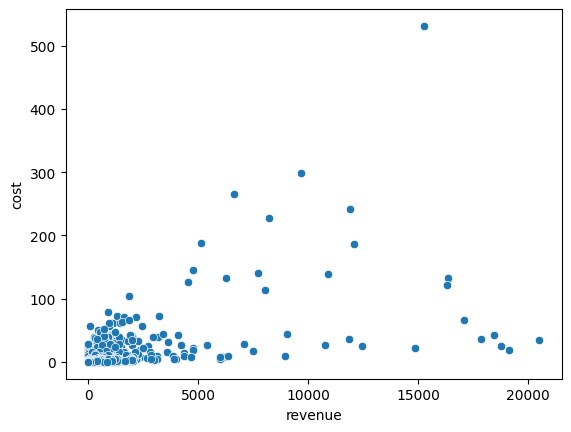

In [17]:
sns.scatterplot(x = data1["revenue"], y = data1["cost"])

<AxesSubplot: xlabel='revenue', ylabel='conversions'>

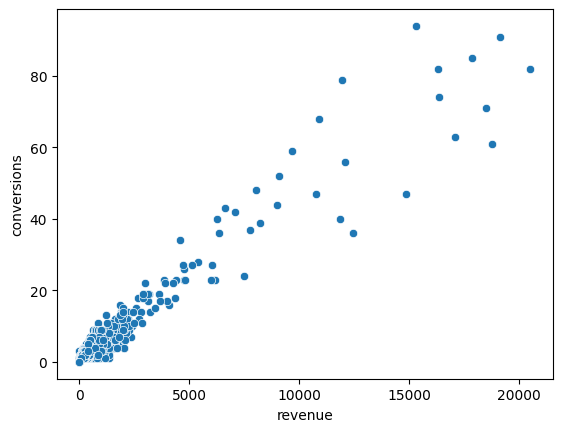

In [18]:
sns.scatterplot(x = data1["revenue"], y = data1["conversions"])

<AxesSubplot: xlabel='revenue', ylabel='impressions'>

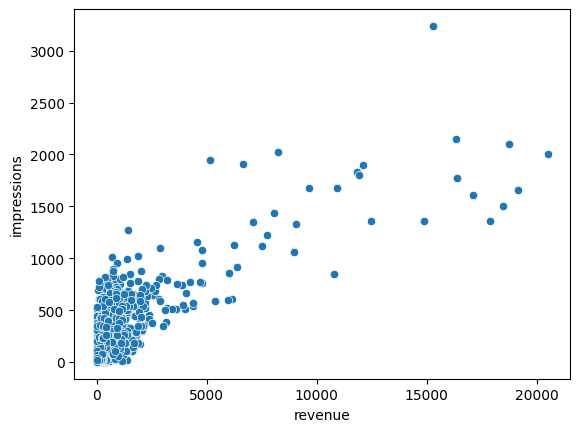

In [19]:
sns.scatterplot(x = data1["revenue"], y = data1["impressions"])

<AxesSubplot: xlabel='revenue', ylabel='clicks'>

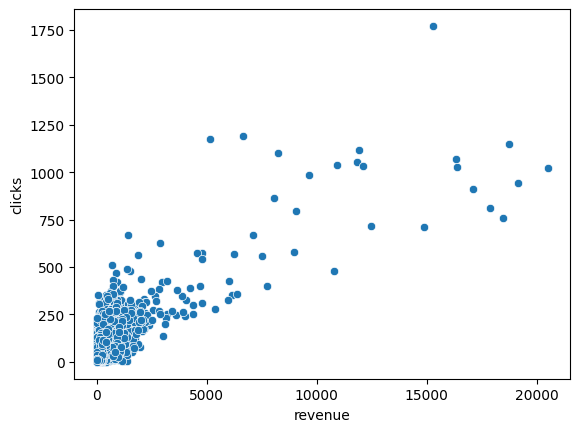

In [20]:
sns.scatterplot(x = data1["revenue"], y = data1["clicks"])

## Dealing with outliers

In [21]:
data1.cost[(data1.cost > 300)] = 300
data1.impressions[(data1.impressions > 1750)] = 1750
data1.clicks[(data1.clicks > 1200)] = 1200
data1.CPC[(data1.CPC > 2)] = 2
data1.CPCON[(data1.CPCON > 25)] = 25

C:\Users\rohit\AppData\Local\Temp\ipykernel_16816\603670092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.cost[(data1.cost > 300)] = 300
C:\Users\rohit\AppData\Local\Temp\ipykernel_16816\603670092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.impressions[(data1.impressions > 1750)] = 1750
C:\Users\rohit\AppData\Local\Temp\ipykernel_16816\603670092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.clicks[

In [22]:
data1.describe()

,impressions,clicks,cost,conversions,revenue,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,91.885145,43.215926,2.750243,1.339094,231.865340,0.058470,0.030382,0.549452,0.439934,0.287464,0.159046,0.365784,0.187705
std,190.405932,98.349439,12.824752,5.223922,1091.742763,0.123671,0.099089,1.860182,0.232061,0.452629,0.365759,0.481702,0.390519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.010610,0.004848,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.015556,0.007805,0.000000,0.451389,0.000000,0.000000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.055000,0.026603,0.220000,0.533333,1.000000,0.000000,1.000000,0.000000
max,1750.000000,1200.000000,300.000000,94.000000,20515.410000,2.000000,3.810000,25.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_data1 = data1.drop(["date", "revenue", "campaign", "ad"], axis = 1)

In [24]:
y_data1 = data1["revenue"]

In [25]:
X_data1.head()

,impressions,clicks,cost,conversions,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,24,6,0.08,0,0.013333,0.003333,0.0000,0.250000,1,0,0,0
1,1,0,0.00,0,0.000000,0.000000,0.0000,0.000000,0,1,0,0
2,13,4,0.04,0,0.010000,0.003077,0.0000,0.307692,0,0,1,0
3,5,4,0.08,0,0.020000,0.016000,0.0000,0.800000,0,0,0,1
4,247,126,1.29,4,0.010238,0.005223,0.3225,0.510121,1,0,0,0


In [26]:
X_data2 = data2.drop(["date", "campaign", "ad"], axis = 1)

In [27]:
X_data2.head()

,cost,impressions,clicks,conversions,cost/clicks,cost/impressions,cost/conversions,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,0.58,121,49,1,0.011837,0.004793,0.58,0.404959,1,0,0,0
1,0.17,22,12,0,0.014167,0.007727,0.00,0.545455,0,0,1,0
2,0.05,5,3,0,0.016667,0.010000,0.00,0.600000,0,0,0,1
3,0.01,2,1,0,0.010000,0.005000,0.00,0.500000,0,1,0,0
4,0.01,3,1,0,0.010000,0.003333,0.00,0.333333,0,1,0,0


## Model Implementation and Algorithm Selection

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_data1,y_data1)

LinearRegression()

In [29]:
y_data1_pred = model.predict(X_data1)

In [30]:
y_data2_pred = model.predict(X_data2)

C:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cost/clicks
- cost/conversions
Feature names seen at fit time, yet now missing:
- CPC
- CPCON

  warnings.warn(message, FutureWarning)


In [31]:
## Evaluation based on Performance Metrics

In [32]:
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y_data1, y_data1_pred)))

RMSE score for Training data:  265.1484027377641


In [33]:
print("R2 score for Training data: ", r2_score(y_data1, y_data1_pred))

R2 score for Training data:  0.9410026631300884


In [34]:
## Extracting obtained output values into a csv file.

In [35]:
result = pd.DataFrame(y_data2_pred) 
result.index = X_data2.index 
result.columns = ["revenue"]
result.to_csv("Resume.csv", index = False) 

In [36]:
result.head()

,revenue
0,94.723637
1,-111.399175
2,-33.535061
3,-14.050209
4,-1.406797
